# EDA y DATA WRANGLING - Colomé

In [5]:
import json
import pandas as pd

In [9]:
# Cambia 'ruta_del_archivo.json' por la ruta de tu archivo JSON
ruta_json = "../raw_data/tickets_classification_eng.json"

# Cargar el archivo JSON como un diccionario
with open(ruta_json, "r", encoding="utf-8") as archivo:
    datos = json.load(archivo)

df = pd.json_normalize(datos)
print(df.head())  # Muestra las primeras filas del DataFrame

                _index      _type      _id  _score   _source.tags  \
0  complaint-public-v2  complaint  3211475     0.0           None   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember   
2  complaint-public-v2  complaint  3199379     0.0           None   
3  complaint-public-v2  complaint  2673060     0.0           None   
4  complaint-public-v2  complaint  3203545     0.0           None   

  _source.zip_code _source.complaint_id                       _source.issue  \
0            90301              3211475   Attempts to collect debt not owed   
1            319XX              3229299     Written notification about debt   
2            77069              3199379  Other features, terms, or problems   
3            48066              2673060      Trouble during payment process   
4            10473              3203545                    Fees or interest   

       _source.date_received _source.state  ... _source.company_response  \
0  2019-04-13T12:00:00-05:00      

In [10]:
# 1. Selección de columnas relevantes
df = df[['_source.complaint_what_happened', '_source.product', '_source.sub_product']]

# 2. Renombrar columnas
df.rename(columns={
    '_source.complaint_what_happened': 'complaint_what_happened',
    '_source.product': 'category',
    '_source.sub_product': 'sub_product'
}, inplace=True)

# 3. Crear columna 'ticket_classification'
df['ticket_classification'] = df['category'] + ' + ' + df['sub_product']

# 4. Eliminar columnas redundantes
df.drop(columns=['category', 'sub_product'], inplace=True)

# 5. Limpieza de datos en 'complaint_what_happened'
# Reemplazar campos vacíos o nulos con 'NaN'
df['complaint_what_happened'] = df['complaint_what_happened'].replace('', pd.NA)

# 6. Eliminar filas con datos faltantes en columnas críticas
df.dropna(subset=['complaint_what_happened', 'ticket_classification'], inplace=True)

# 7. Reiniciar el índice
df.reset_index(drop=True, inplace=True)

# 8. Guardar como archivo CSV
df.to_csv('../data/cleaned_tickets.csv', index=False)
print("Dataset limpio guardado como 'cleaned_tickets.csv'")


Dataset limpio guardado como 'cleaned_tickets.csv'


In [11]:
df

,complaint_what_happened,ticket_classification
0,Good morning my name is XXXX XXXX and I apprec...,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card + General-purpose ...
2,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o..."
3,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o..."
4,my grand son give me check for {$1600.00} i de...,Checking or savings account + Checking account
...,...,...
18958,My husband passed away. Chase bank put check o...,Checking or savings account + Checking account
18959,After being a Chase Card customer for well ove...,Credit card or prepaid card + General-purpose ...
18960,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card + General-purpose ...
18961,I am not familiar with XXXX pay and did not un...,Checking or savings account + Checking account


In [13]:
df.describe(include="all")

,complaint_what_happened,ticket_classification
count,18963,18963
unique,18824,78
top,Chase has violated 15 USC 1692 by continuing c...,Credit card or prepaid card + General-purpose ...
freq,11,4918


count    18963.000000
mean      1411.152349
std       1550.977004
min         19.000000
25%        536.000000
50%        999.000000
75%       1760.000000
max      31611.000000
Name: text_length, dtype: float64


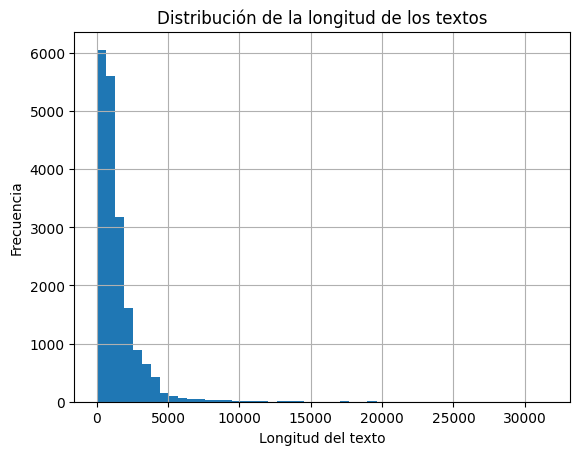

In [15]:
df['text_length'] = df['complaint_what_happened'].apply(len)
print(df['text_length'].describe())

import matplotlib.pyplot as plt
df['text_length'].hist(bins=50)
plt.title("Distribución de la longitud de los textos")
plt.xlabel("Longitud del texto")
plt.ylabel("Frecuencia")
plt.show()
